In [3]:
import numpy as np
import matplotlib.pyplot as pyplot

In [1]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

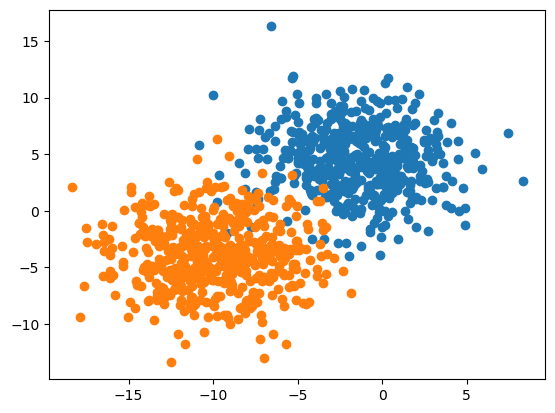

In [4]:
for class_value in range(2):
  # get row indexes for samples with this class
  row_ix = np.where(y == class_value)
  # create scatter of these samples
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])